We Will be implementing Regression using Neural Network , i.e Predicting values of dependent variable using independent input features

In [2]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt

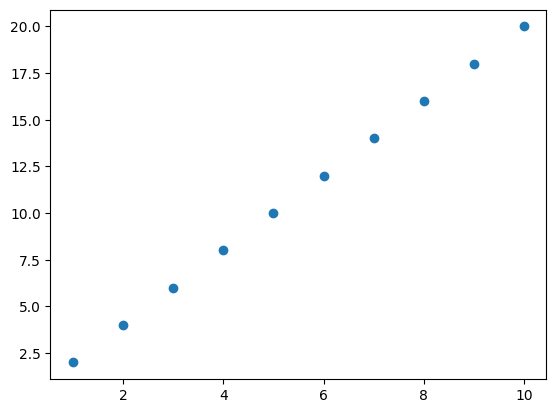

In [4]:
# Basic Regression Formulation using Numpy

a = np.array([1,2,3,4,5,6,7,8,9,10])
b= np.array([2,4,6,8,10,12,14,16,18,20])

# For accessing we use x[0].ndim we gwt no dimensions as it is an array of scalar values and no dimensions
plt.scatter(a,b)
plt.show()

In [8]:
a.shape()

TypeError: 'tuple' object is not callable

In [5]:
# Using Tensorflow or tensors

House_features = tf.constant(["Bedrooms","Bathrooms","Area"])
Price = tf.constant([74000])

print(House_features,Price)
print(f"Input Features Shape : {House_features.shape}")
print(f"Output Shape : {Price.shape}")

tf.Tensor([b'Bedrooms' b'Bathrooms' b'Area'], shape=(3,), dtype=string) tf.Tensor([74000], shape=(1,), dtype=int32)
Input Features Shape : (3,)
Output Shape : (1,)


# Converting numpy arrays to tensors

---



In [6]:
X = tf.constant(a)
y = tf.constant(b)

In [10]:
print(X,y)
print(f"Shape of X : {X.shape},  y : {y.shape}")
#But it is a regression probelm so we need X[] scalar value to predict a scalar value y[] respectively
print(X[1].shape) # void means 0 dimensions or scalar value

tf.Tensor([ 1  2  3  4  5  6  7  8  9 10], shape=(10,), dtype=int64) tf.Tensor([ 2  4  6  8 10 12 14 16 18 20], shape=(10,), dtype=int64)
Shape of X : (10,),  y : (10,)
()


### Steps for modelling a neural network

* Make the data into proper format after preprocessing and EDA
* One can also pick a model prebuilt or formulate through scratch using the steps (1) below

1. Create a model : Define input output and hidden layers
2. Compile the model : Define loss function and a optimizer function and evaluation matrix
3. Fitting a model : Letting our model try to generalize the predictions using X,y from training set
4. Evaluate the model : Evaluate on the testing dataset
5. Improve through Experimentation
6. Save and load the finetuned model